In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

## Reading and Understanding Data

In [2]:
cp = pd.read_csv("CarPrice_Assignment.csv")
cp.head(10)

#Looking for nulls in dataset
cp.isnull().sum()

#Checking at higher level
cp.info()

#There are no nulls in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [3]:
#Looking for duplicates car_id in dataset
cp.car_ID.value_counts()

205    1
64     1
74     1
73     1
72     1
      ..
134    1
133    1
132    1
131    1
1      1
Name: car_ID, Length: 205, dtype: int64

In [4]:
#checking data types of features
cp.info()
#Data type of each feature looks appropriate

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
#Checking data in car name column
cp.CarName.unique()
cp.CarName.value_counts()


# Extract the 'company name' and the 'car model' from the 'CarName' column & create new column for the same.
cp['company_name'] = cp['CarName'].str.split().str[0]

cp.company_name.unique()


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [6]:
# company_name column needs to be cleaned up since it has few company name which are repeating but with slightly different version
# For example : vokswagen, volkswagen, and vw
#Following code cleans up such data

cp['company_name'] = cp['company_name'].replace(['porcshce'], 'porsche')
cp['company_name'] = cp['company_name'].replace(['toyouta'], 'toyota')
cp['company_name'] = cp['company_name'].replace(['volkswagen', 'vokswagen', 'vw'], 'volkswagen')
cp['company_name'] = cp['company_name'].replace(['alfa-romero'], 'alfa-romeo')
cp['company_name'] = cp['company_name'].replace(['maxda', 'Mazda'], 'mazda')
cp['company_name'] = cp['company_name'].replace(['Nissan'], 'nissan')


#Checking company name data again
cp.company_name.unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [7]:
cp.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Visualizing Dataset

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

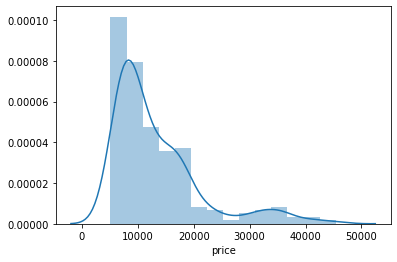

In [9]:
#Let's see distribution for car price
sns.distplot(cp.price)
plt.show()

In [10]:
# Visualizing Numerical Variables using pair plot
plt.figure(figsize=(12,12))
#sns.pairplot(cp)
#plt.show()

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

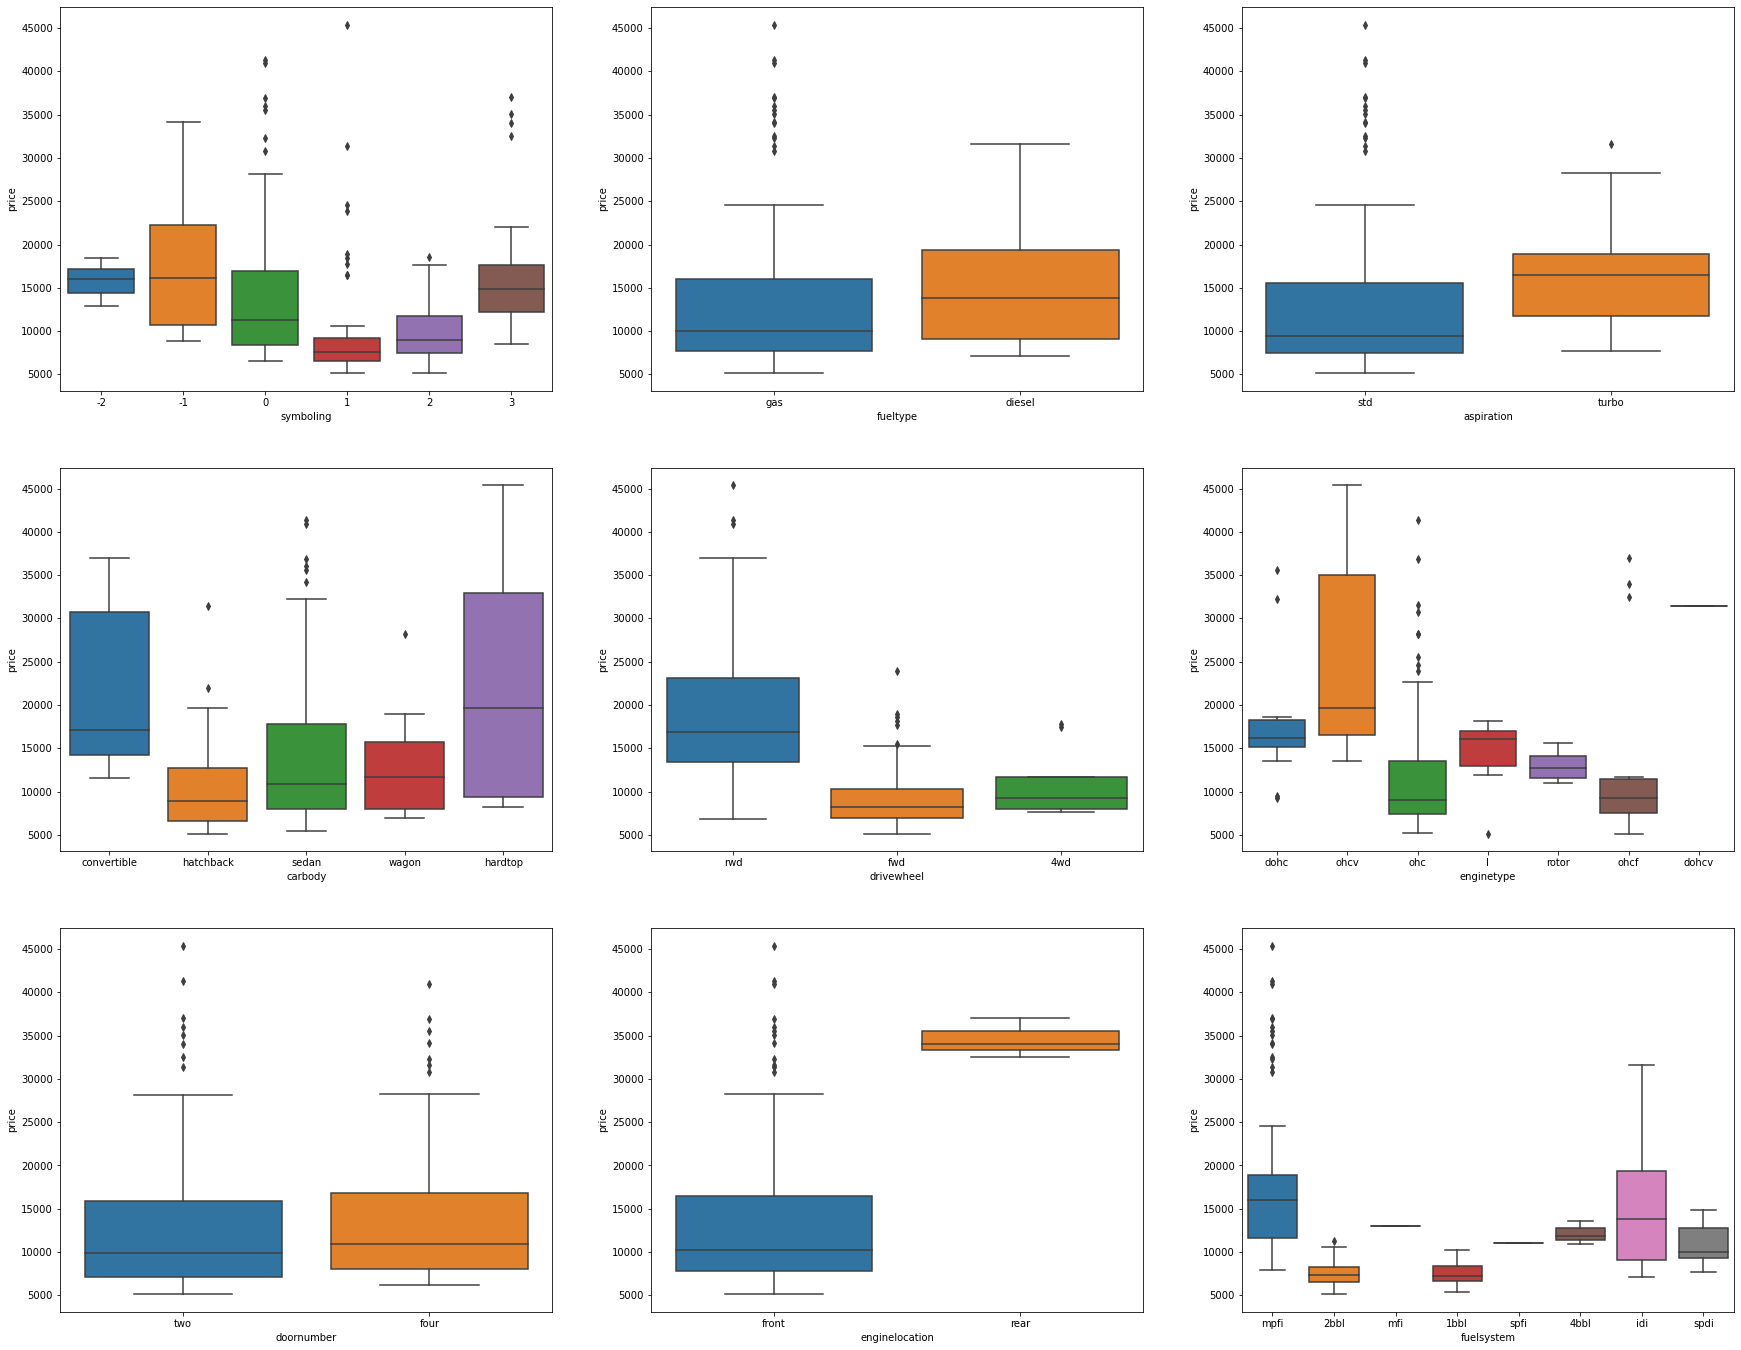

In [11]:
# Visualizing Categorical Variables Using box plot
plt.figure(figsize=(30, 24))
plt.subplot(3,3,1)
sns.boxplot(x = 'symboling', y = 'price', data = cp)
plt.subplot(3,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = cp)
plt.subplot(3,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = cp)
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = cp)
plt.subplot(3,3,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = cp)
plt.subplot(3,3,6)
sns.boxplot(x = 'enginetype', y = 'price', data = cp)
plt.subplot(3,3,7)
sns.boxplot(x = 'doornumber', y = 'price', data = cp)
plt.subplot(3,3,8)
sns.boxplot(x = 'enginelocation', y = 'price', data = cp)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = cp)
plt.show()

## Data Preparation
We notice in above box plots that there are categorical variables with just 2,3,5 , and 7 unique values.Let's convert them into numerical data using binary encoding and dummy variables

In [12]:
#All categorical variables with 2 levels will be converted using binary encoding
cp['doornumber'] = cp['doornumber'].map({'two':0, 'four':1})
cp['enginelocation'] = cp['enginelocation'].map({'rear':0, 'front':1})
cp['fueltype'] = cp['fueltype'].map({'diesel':0, 'gas':1})
cp.head()





,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company_name
0,1,3,alfa-romero giulia,1,std,0,convertible,rwd,1,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romeo
1,2,3,alfa-romero stelvio,1,std,0,convertible,rwd,1,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romeo
2,3,1,alfa-romero Quadrifoglio,1,std,0,hatchback,rwd,1,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romeo
3,4,2,audi 100 ls,1,std,1,sedan,fwd,1,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,1,std,1,sedan,4wd,1,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [13]:
cp['aspiration'] = cp['aspiration'].map({'turbo':0, 'std':1})
cp.aspiration.unique()

array([1, 0], dtype=int64)

In [14]:
#All categorical variables with above 2 levels will be converted using dummy variables
cp = pd.get_dummies(cp, columns=['drivewheel','carbody', 'enginetype', 'cylindernumber', 'fuelsystem'])
cp.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,alfa-romero giulia,1,1,0,1,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
1,2,3,alfa-romero stelvio,1,1,0,1,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
2,3,1,alfa-romero Quadrifoglio,1,1,0,1,94.5,171.2,65.5,...,0,0,0,0,0,0,0,1,0,0
3,4,2,audi 100 ls,1,1,1,1,99.8,176.6,66.2,...,0,0,0,0,0,0,0,1,0,0
4,5,2,audi 100ls,1,1,1,1,99.4,176.6,66.4,...,0,0,0,0,0,0,0,1,0,0


In [15]:
#Dropping categorical columns which has least effect on car price based on the results obtained from Box Plots

cp.drop(labels = ['drivewheel_4wd'], axis = 1, inplace = True)
cp.drop(labels = ['carbody_hatchback'], axis = 1, inplace = True)
cp.drop(labels = ['enginetype_rotor'], axis = 1, inplace = True)
cp.drop(labels = ['cylindernumber_three'], axis = 1, inplace = True)
cp.drop(labels = ['fuelsystem_1bbl'], axis = 1, inplace = True)




In [16]:
cp.head()
cp.shape

(205, 47)

In [17]:
#Creating Bins for Car Name based upon it's median price
pricegp = pd.DataFrame(round(cp.groupby('company_name').price.mean().sort_values(ascending=False),2).reset_index())

bins = [0, 10000, 20000, 50000]
CarLabels = ['EcoCar', 'MidTierCar', 'LuxuryCar']
pricegp = pricegp.join(pd.get_dummies(pd.cut(pricegp.price, bins, labels=CarLabels)))
pricegp

,company_name,price,EcoCar,MidTierCar,LuxuryCar
0,jaguar,34600.00,0,0,1
1,buick,33647.00,0,0,1
2,porsche,31400.50,0,0,1
3,bmw,26118.75,0,0,1
4,volvo,18063.18,0,1,0
5,audi,17859.17,0,1,0
6,mercury,16503.00,0,1,0
7,alfa-romeo,15498.33,0,1,0
8,peugeot,15489.09,0,1,0
9,saab,15223.33,0,1,0


In [18]:
#Adding above result with original data set and creating a new data frame
#cp1 = pd.concat([cp, pricegp], axis = 1)
#cp1.head(15)
#cp1.info()

cpn = cp.merge(pricegp, on='company_name')
cpn.head()
cpn.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 51 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   car_ID                 205 non-null    int64  
 1   symboling              205 non-null    int64  
 2   CarName                205 non-null    object 
 3   fueltype               205 non-null    int64  
 4   aspiration             205 non-null    int64  
 5   doornumber             205 non-null    int64  
 6   enginelocation         205 non-null    int64  
 7   wheelbase              205 non-null    float64
 8   carlength              205 non-null    float64
 9   carwidth               205 non-null    float64
 10  carheight              205 non-null    float64
 11  curbweight             205 non-null    int64  
 12  enginesize             205 non-null    int64  
 13  boreratio              205 non-null    float64
 14  stroke                 205 non-null    float64
 15  compre

In [19]:
#Dropping Car_id, company_name, CarName, and EcoCar
cpn.drop(['car_ID','CarName','company_name','EcoCar','price_y'], axis = 1, inplace = True)
cpn.head()



,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,MidTierCar,LuxuryCar
0,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,1,0,0,1,0
1,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,1,0,0,1,0
2,1,1,1,0,1,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,1,0,0,1,0
3,2,1,1,1,1,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,1,0,0,1,0
4,2,1,1,1,1,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,1,0,0,1,0


In [20]:
#renaming price_x to price
cpn.rename(columns = {'price_x': 'price'},inplace=True)
cpn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   symboling              205 non-null    int64  
 1   fueltype               205 non-null    int64  
 2   aspiration             205 non-null    int64  
 3   doornumber             205 non-null    int64  
 4   enginelocation         205 non-null    int64  
 5   wheelbase              205 non-null    float64
 6   carlength              205 non-null    float64
 7   carwidth               205 non-null    float64
 8   carheight              205 non-null    float64
 9   curbweight             205 non-null    int64  
 10  enginesize             205 non-null    int64  
 11  boreratio              205 non-null    float64
 12  stroke                 205 non-null    float64
 13  compressionratio       205 non-null    float64
 14  horsepower             205 non-null    int64  
 15  peakrp

In [21]:
cpn.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,MidTierCar,LuxuryCar
0,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,1,0,0,1,0
1,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,1,0,0,1,0
2,1,1,1,0,1,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,1,0,0,1,0
3,2,1,1,1,1,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,1,0,0,1,0
4,2,1,1,1,1,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,1,0,0,1,0


In [22]:
#Creating Bins for symboling based upon it's data and 
SymbolingLabels = ['LowRisk', 'ModerateRisk', 'HighRisk']
bins = [-3, -2, 2, 3]

cpn = cpn.join(pd.get_dummies(pd.cut(cpn['symboling'], bins, labels=SymbolingLabels)))
cpn.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,MidTierCar,LuxuryCar,LowRisk,ModerateRisk,HighRisk
0,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,1,0,0,1,0,0,0,1
1,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,1,0,0,1,0,0,0,1
2,1,1,1,0,1,94.5,171.2,65.5,52.4,2823,...,0,0,1,0,0,1,0,0,1,0
3,2,1,1,1,1,99.8,176.6,66.2,54.3,2337,...,0,0,1,0,0,1,0,0,1,0
4,2,1,1,1,1,99.4,176.6,66.4,54.3,2824,...,0,0,1,0,0,1,0,0,1,0


In [23]:
#Dropping one risk category and symboling column
cpn.drop(['HighRisk','symboling'], axis = 1, inplace = True)
cpn.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,MidTierCar,LuxuryCar,LowRisk,ModerateRisk
0,1,1,0,1,88.6,168.8,64.1,48.8,2548,130,...,0,0,0,1,0,0,1,0,0,0
1,1,1,0,1,88.6,168.8,64.1,48.8,2548,130,...,0,0,0,1,0,0,1,0,0,0
2,1,1,0,1,94.5,171.2,65.5,52.4,2823,152,...,0,0,0,1,0,0,1,0,0,1
3,1,1,1,1,99.8,176.6,66.2,54.3,2337,109,...,0,0,0,1,0,0,1,0,0,1
4,1,1,1,1,99.4,176.6,66.4,54.3,2824,136,...,0,0,0,1,0,0,1,0,0,1


In [24]:
cpn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fueltype               205 non-null    int64  
 1   aspiration             205 non-null    int64  
 2   doornumber             205 non-null    int64  
 3   enginelocation         205 non-null    int64  
 4   wheelbase              205 non-null    float64
 5   carlength              205 non-null    float64
 6   carwidth               205 non-null    float64
 7   carheight              205 non-null    float64
 8   curbweight             205 non-null    int64  
 9   enginesize             205 non-null    int64  
 10  boreratio              205 non-null    float64
 11  stroke                 205 non-null    float64
 12  compressionratio       205 non-null    float64
 13  horsepower             205 non-null    int64  
 14  peakrpm                205 non-null    int64  
 15  citymp

## Splitting the Data Into Test And Train Set


In [25]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(cpn, train_size = 0.7, test_size = 0.3, random_state = 100)

## Rescaling The Features

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [27]:
# Applying the scaling on continuous numerical variables
v_scale = ['carlength','carwidth','carheight','wheelbase','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','price']

df_train[v_scale] = scaler.fit_transform(df_train[v_scale])

df_train.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,MidTierCar,LuxuryCar,LowRisk,ModerateRisk
122,1,1,1,1,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,...,0,0,0,0,0,0,0,0,0,1
125,1,1,0,1,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,...,0,0,0,1,0,0,0,1,0,0
166,1,1,0,1,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,...,0,0,0,1,0,0,0,0,0,1
1,1,1,0,1,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,...,0,0,0,1,0,0,1,0,0,0
199,1,0,1,1,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,...,0,0,0,1,0,0,1,0,0,1


In [28]:
df_train.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,MidTierCar,LuxuryCar,LowRisk,ModerateRisk
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.0,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000
mean,0.909091,0.818182,0.559441,0.993007,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,...,0.020979,0.090909,0.0,0.440559,0.041958,0.0,0.412587,0.118881,0.013986,0.860140
std,0.288490,0.387050,0.498199,0.083624,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,...,0.143818,0.288490,0.0,0.498199,0.201198,0.0,0.494030,0.324786,0.117845,0.348061
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,0.272414,0.399187,0.304167,0.353982,0.245539,0.135849,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,0.341379,0.502439,0.425000,0.522124,0.355702,0.184906,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,0.503448,0.669919,0.550000,0.668142,0.559542,0.301887,...,0.000000,0.000000,0.0,1.000000,0.000000,0.0,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [29]:
y_train = df_train.pop('price')
X_train = df_train



## Recursive Feature Elimination


In [30]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [31]:
#X_train.info()
X_train.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,MidTierCar,LuxuryCar,LowRisk,ModerateRisk
122,1,1,1,1,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,...,0,0,0,0,0,0,0,0,0,1
125,1,1,0,1,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,...,0,0,0,1,0,0,0,1,0,0
166,1,1,0,1,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,...,0,0,0,1,0,0,0,0,0,1
1,1,1,0,1,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,...,0,0,0,1,0,0,1,0,0,0
199,1,0,1,1,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,...,0,0,0,1,0,0,1,0,0,1


In [32]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

# Running RFE with 15 output variables.
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [33]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 3),
 ('aspiration', False, 15),
 ('doornumber', False, 28),
 ('enginelocation', True, 1),
 ('wheelbase', False, 8),
 ('carlength', False, 10),
 ('carwidth', True, 1),
 ('carheight', False, 16),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 14),
 ('horsepower', True, 1),
 ('peakrpm', False, 5),
 ('citympg', False, 30),
 ('highwaympg', False, 26),
 ('drivewheel_fwd', False, 19),
 ('drivewheel_rwd', False, 27),
 ('carbody_convertible', True, 1),
 ('carbody_hardtop', False, 20),
 ('carbody_sedan', False, 21),
 ('carbody_wagon', False, 25),
 ('enginetype_dohc', False, 17),
 ('enginetype_dohcv', False, 2),
 ('enginetype_l', False, 18),
 ('enginetype_ohc', True, 1),
 ('enginetype_ohcf', False, 9),
 ('enginetype_ohcv', False, 4),
 ('cylindernumber_eight', True, 1),
 ('cylindernumber_five', True, 1),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', True, 1),
 ('cylindernumber_twelve'

In [34]:
# Lets see the columns that RFE supports - 
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'horsepower', 'carbody_convertible', 'enginetype_ohc',
       'cylindernumber_eight', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_twelve', 'LuxuryCar'],
      dtype='object')

In [35]:
# Lets see the variables the are rejected by RFE - 
X_train.columns[~rfe.support_]

Index(['fueltype', 'aspiration', 'doornumber', 'wheelbase', 'carlength',
       'carheight', 'compressionratio', 'peakrpm', 'citympg', 'highwaympg',
       'drivewheel_fwd', 'drivewheel_rwd', 'carbody_hardtop', 'carbody_sedan',
       'carbody_wagon', 'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohcf', 'enginetype_ohcv', 'cylindernumber_two',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi', 'MidTierCar', 'LowRisk', 'ModerateRisk'],
      dtype='object')

In [36]:
# Creating X_train_rfe dataframe with RFE selected variables
X_train_rfe = X_train[col]

X_train_rfe.head()

,enginelocation,carwidth,curbweight,enginesize,boreratio,stroke,horsepower,carbody_convertible,enginetype_ohc,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,LuxuryCar
122,1,0.291667,0.272692,0.139623,0.230159,0.525253,0.083333,0,1,0,0,1,0,0,0
125,1,0.666667,0.500388,0.339623,1.000000,0.464646,0.395833,0,1,0,0,1,0,0,1
166,1,0.308333,0.314973,0.139623,0.444444,0.449495,0.266667,0,0,0,0,1,0,0,0
1,1,0.316667,0.411171,0.260377,0.626984,0.247475,0.262500,1,0,0,0,1,0,0,0
199,1,0.575000,0.647401,0.260377,0.746032,0.484848,0.475000,0,1,0,0,1,0,0,0


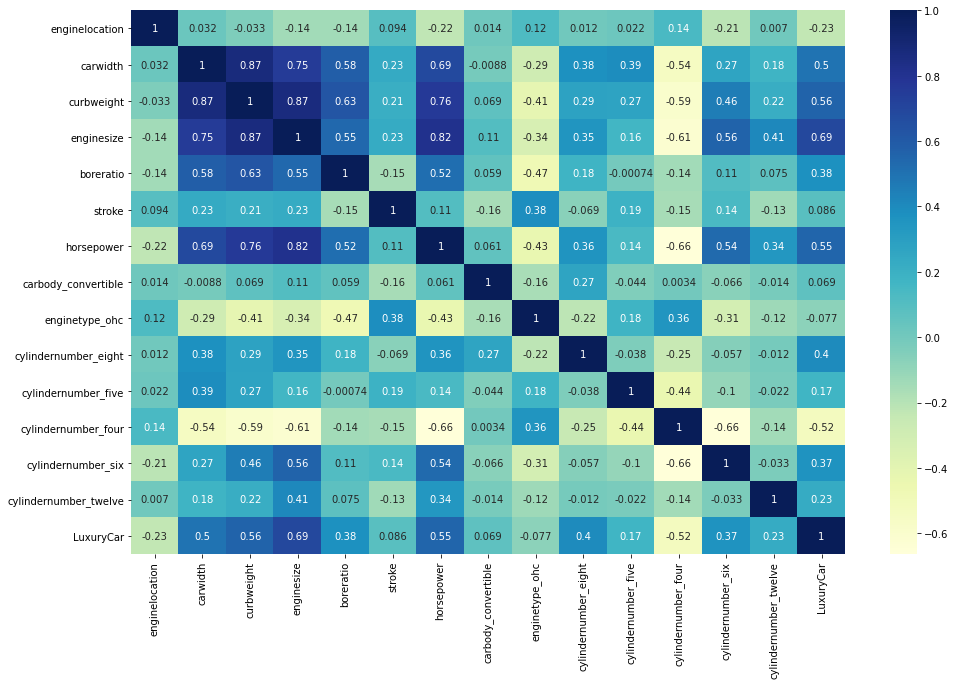

In [37]:
# Visualizing RFE chosen features using coorelation plot

plt.figure(figsize = (16, 10))
sns.heatmap(X_train_rfe.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Building model using statsmodel, for the detailed statistics


In [38]:
# Adding a constant variable 
import statsmodels.api as sm 

X_train_new = X_train_rfe

X_train_lm = sm.add_constant(X_train_new)

In [39]:
# Running the linear model
lr_1 = sm.OLS(y_train,X_train_lm).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     138.2
Date:                Fri, 02 Oct 2020   Prob (F-statistic):           6.28e-71
Time:                        14:53:29   Log-Likelihood:                 220.85
No. Observations:                 143   AIC:                            -409.7
Df Residuals:                     127   BIC:                            -362.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.37

## Observation :
p-value of each feature is quite low

In [40]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,enginesize,119.21
0,enginelocation,87.35
2,curbweight,49.80
1,carwidth,47.62
5,stroke,45.69
4,boreratio,40.73
11,cylindernumber_four,40.35
12,cylindernumber_six,23.65
6,horsepower,13.78
8,enginetype_ohc,9.80


## Observation
From the stats model summary of model, we see that all the p-values are in the allowed range. From the VIF table above we see that enginesize has a very high vif value. Lets drop it and re-bilud our model.

In [41]:
X_train_1 = X_train_new.drop(["enginesize"], axis = 1)

# Run the linear model
X_train_linear_model = sm.add_constant(X_train_1)
linear_model = sm.OLS(y_train, X_train_linear_model).fit() 

#Let's see the summary of the new linear model
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     137.0
Date:                Fri, 02 Oct 2020   Prob (F-statistic):           8.06e-70
Time:                        14:53:29   Log-Likelihood:                 215.14
No. Observations:                 143   AIC:                            -400.3
Df Residuals:                     128   BIC:                            -355.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.25

In [42]:
# Calculate the VIFs again for the new model

vif_1 = pd.DataFrame()
X = X_train_1
vif_1['Features'] = X.columns
vif_1['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_1['VIF'] = round(vif_1['VIF'], 2)
vif_1 = vif_1.sort_values(by = "VIF", ascending = False)
vif_1

,Features,VIF
1,carwidth,47.23
0,enginelocation,41.81
2,curbweight,36.72
10,cylindernumber_four,25.62
3,boreratio,24.18
4,stroke,23.06
5,horsepower,13.10
7,enginetype_ohc,9.60
11,cylindernumber_six,6.58
9,cylindernumber_five,4.18


## Observation:
P value of boreratio is high now, let's drop this column

In [43]:
X_train_1 = X_train_1.drop(["boreratio"], axis = 1)

# Run the linear model
X_train_linear_model = sm.add_constant(X_train_1)
linear_model = sm.OLS(y_train, X_train_linear_model).fit() 

#Let's see the summary of the new linear model
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     148.0
Date:                Fri, 02 Oct 2020   Prob (F-statistic):           8.84e-71
Time:                        14:53:29   Log-Likelihood:                 214.79
No. Observations:                 143   AIC:                            -401.6
Df Residuals:                     129   BIC:                            -360.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.23

In [44]:
# Calculate the VIFs again for the new model

vif_1 = pd.DataFrame()
X = X_train_1
vif_1['Features'] = X.columns
vif_1['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_1['VIF'] = round(vif_1['VIF'], 2)
vif_1 = vif_1.sort_values(by = "VIF", ascending = False)
vif_1

,Features,VIF
1,carwidth,44.31
0,enginelocation,38.98
2,curbweight,34.98
9,cylindernumber_four,23.98
3,stroke,21.38
4,horsepower,10.79
6,enginetype_ohc,8.83
10,cylindernumber_six,6.04
8,cylindernumber_five,4.08
7,cylindernumber_eight,2.62


## Observation:
cylindernumber_twelve has high p-value, let's drop this column

In [45]:
X_train_1 = X_train_1.drop(["cylindernumber_twelve"], axis = 1)

# Run the linear model
X_train_linear_model = sm.add_constant(X_train_1)
linear_model = sm.OLS(y_train, X_train_linear_model).fit() 

#Let's see the summary of the new linear model
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     160.4
Date:                Fri, 02 Oct 2020   Prob (F-statistic):           1.04e-71
Time:                        14:53:29   Log-Likelihood:                 214.32
No. Observations:                 143   AIC:                            -402.6
Df Residuals:                     130   BIC:                            -364.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2388 

In [46]:
# Calculate the VIFs again for the new model

vif_1 = pd.DataFrame()
X = X_train_1
vif_1['Features'] = X.columns
vif_1['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_1['VIF'] = round(vif_1['VIF'], 2)
vif_1 = vif_1.sort_values(by = "VIF", ascending = False)
vif_1

,Features,VIF
1,carwidth,44.30
0,enginelocation,36.14
2,curbweight,34.71
9,cylindernumber_four,20.42
3,stroke,19.96
4,horsepower,9.11
6,enginetype_ohc,8.48
10,cylindernumber_six,4.37
8,cylindernumber_five,3.41
11,LuxuryCar,2.44


# Observation:
cylindernumber_six has p value, let's drop this column


In [47]:
X_train_1 = X_train_1.drop(["cylindernumber_six"], axis = 1)

# Run the linear model
X_train_linear_model = sm.add_constant(X_train_1)
linear_model = sm.OLS(y_train, X_train_linear_model).fit() 

#Let's see the summary of the new linear model
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     175.1
Date:                Fri, 02 Oct 2020   Prob (F-statistic):           1.17e-72
Time:                        14:53:29   Log-Likelihood:                 213.85
No. Observations:                 143   AIC:                            -403.7
Df Residuals:                     131   BIC:                            -368.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2165 

In [48]:
# Calculate the VIFs again for the new model

vif_1 = pd.DataFrame()
X = X_train_1
vif_1['Features'] = X.columns
vif_1['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_1['VIF'] = round(vif_1['VIF'], 2)
vif_1 = vif_1.sort_values(by = "VIF", ascending = False)
vif_1

,Features,VIF
1,carwidth,43.98
2,curbweight,33.35
0,enginelocation,30.58
3,stroke,19.94
9,cylindernumber_four,10.44
4,horsepower,8.87
6,enginetype_ohc,8.19
10,LuxuryCar,2.44
8,cylindernumber_five,2.13
7,cylindernumber_eight,1.63


# Observation:
cylindernumber_eight has high p-value, let's drop it.

In [49]:
X_train_1 = X_train_1.drop(["cylindernumber_eight"], axis = 1)

# Run the linear model
X_train_linear_model = sm.add_constant(X_train_1)
linear_model = sm.OLS(y_train, X_train_linear_model).fit() 

#Let's see the summary of the new linear model
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     192.0
Date:                Fri, 02 Oct 2020   Prob (F-statistic):           1.60e-73
Time:                        14:53:29   Log-Likelihood:                 213.12
No. Observations:                 143   AIC:                            -404.2
Df Residuals:                     132   BIC:                            -371.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2268    

In [50]:
# Calculate the VIFs again for the new model

vif_1 = pd.DataFrame()
X = X_train_1
vif_1['Features'] = X.columns
vif_1['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_1['VIF'] = round(vif_1['VIF'], 2)
vif_1 = vif_1.sort_values(by = "VIF", ascending = False)
vif_1

,Features,VIF
1,carwidth,37.44
0,enginelocation,30.57
2,curbweight,30.19
3,stroke,19.82
8,cylindernumber_four,10.33
4,horsepower,8.85
6,enginetype_ohc,8.17
9,LuxuryCar,2.27
7,cylindernumber_five,2.03
5,carbody_convertible,1.10


# Observation:
stroke has both high p value and high vif, let's drop it

In [51]:
X_train_1 = X_train_1.drop(["stroke"], axis = 1)

# Run the linear model
X_train_linear_model = sm.add_constant(X_train_1)
linear_model = sm.OLS(y_train, X_train_linear_model).fit() 

#Let's see the summary of the new linear model
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     209.6
Date:                Fri, 02 Oct 2020   Prob (F-statistic):           5.00e-74
Time:                        14:53:29   Log-Likelihood:                 211.45
No. Observations:                 143   AIC:                            -402.9
Df Residuals:                     133   BIC:                            -373.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2050    

In [52]:
# Calculate the VIFs again for the new model

vif_1 = pd.DataFrame()
X = X_train_1
vif_1['Features'] = X.columns
vif_1['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_1['VIF'] = round(vif_1['VIF'], 2)
vif_1 = vif_1.sort_values(by = "VIF", ascending = False)
vif_1

,Features,VIF
1,carwidth,37.38
2,curbweight,28.65
0,enginelocation,25.44
7,cylindernumber_four,9.89
3,horsepower,8.84
5,enginetype_ohc,5.63
8,LuxuryCar,2.16
6,cylindernumber_five,1.98
4,carbody_convertible,1.10


# Observation :
cylindernumber_five has high p-value, let's drop it

In [53]:
X_train_1 = X_train_1.drop(["cylindernumber_five"], axis = 1)

# Run the linear model
X_train_linear_model = sm.add_constant(X_train_1)
linear_model = sm.OLS(y_train, X_train_linear_model).fit() 

#Let's see the summary of the new linear model
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     230.1
Date:                Fri, 02 Oct 2020   Prob (F-statistic):           2.32e-74
Time:                        14:53:29   Log-Likelihood:                 209.31
No. Observations:                 143   AIC:                            -400.6
Df Residuals:                     134   BIC:                            -373.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1909    

In [54]:
# Calculate the VIFs again for the new model

vif_1 = pd.DataFrame()
X = X_train_1
vif_1['Features'] = X.columns
vif_1['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_1['VIF'] = round(vif_1['VIF'], 2)
vif_1 = vif_1.sort_values(by = "VIF", ascending = False)
vif_1

,Features,VIF
1,carwidth,33.30
2,curbweight,28.63
0,enginelocation,25.44
3,horsepower,8.24
6,cylindernumber_four,7.16
5,enginetype_ohc,4.70
7,LuxuryCar,2.09
4,carbody_convertible,1.09


## Observation:
P-values are in acceptable range. Carwidth has high VIF. So let's drop it

In [55]:
X_train_1 = X_train_1.drop(["carwidth"], axis = 1)

# Run the linear model
X_train_linear_model = sm.add_constant(X_train_1)
linear_model = sm.OLS(y_train, X_train_linear_model).fit() 

#Let's see the summary of the new linear model
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     233.4
Date:                Fri, 02 Oct 2020   Prob (F-statistic):           3.76e-72
Time:                        14:53:29   Log-Likelihood:                 200.90
No. Observations:                 143   AIC:                            -385.8
Df Residuals:                     135   BIC:                            -362.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1837    

In [56]:
# Calculate the VIFs again for the new model

vif_1 = pd.DataFrame()
X = X_train_1
vif_1['Features'] = X.columns
vif_1['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_1['VIF'] = round(vif_1['VIF'], 2)
vif_1 = vif_1.sort_values(by = "VIF", ascending = False)
vif_1

,Features,VIF
0,enginelocation,23.03
1,curbweight,13.66
2,horsepower,8.13
5,cylindernumber_four,7.14
4,enginetype_ohc,4.59
6,LuxuryCar,2.08
3,carbody_convertible,1.07


## Observation:
P-values are in acceptable range. enginelocation has high VIF. So let's drop it

In [57]:
X_train_1 = X_train_1.drop(["enginelocation"], axis = 1)

# Run the linear model
X_train_linear_model = sm.add_constant(X_train_1)
linear_model = sm.OLS(y_train, X_train_linear_model).fit() 

#Let's see the summary of the new linear model
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     250.8
Date:                Fri, 02 Oct 2020   Prob (F-statistic):           5.79e-71
Time:                        14:53:30   Log-Likelihood:                 195.01
No. Observations:                 143   AIC:                            -376.0
Df Residuals:                     136   BIC:                            -355.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0328    

In [58]:
# Calculate the VIFs again for the new model

vif_1 = pd.DataFrame()
X = X_train_1
vif_1['Features'] = X.columns
vif_1['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_1['VIF'] = round(vif_1['VIF'], 2)
vif_1 = vif_1.sort_values(by = "VIF", ascending = False)
vif_1

,Features,VIF
0,curbweight,9.70
1,horsepower,7.52
4,cylindernumber_four,4.33
3,enginetype_ohc,3.52
5,LuxuryCar,1.98
2,carbody_convertible,1.07


## Observation:
curbweight has high VIF, let's drop it


In [59]:
X_train_1 = X_train_1.drop(["curbweight"], axis = 1)

# Run the linear model
X_train_linear_model = sm.add_constant(X_train_1)
linear_model = sm.OLS(y_train, X_train_linear_model).fit() 

#Let's see the summary of the new linear model
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     144.7
Date:                Fri, 02 Oct 2020   Prob (F-statistic):           7.40e-53
Time:                        14:53:30   Log-Likelihood:                 148.32
No. Observations:                 143   AIC:                            -284.6
Df Residuals:                     137   BIC:                            -266.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1112    

In [60]:
# Calculate the VIFs again for the new model

vif_1 = pd.DataFrame()
X = X_train_1
vif_1['Features'] = X.columns
vif_1['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_1['VIF'] = round(vif_1['VIF'], 2)
vif_1 = vif_1.sort_values(by = "VIF", ascending = False)
vif_1

,Features,VIF
3,cylindernumber_four,3.83
2,enginetype_ohc,3.51
0,horsepower,2.30
4,LuxuryCar,1.89
1,carbody_convertible,1.07


## Observation:
enginetype_ohc has p-value, let's drop it

In [61]:
X_train_1 = X_train_1.drop(["enginetype_ohc"], axis = 1)

# Run the linear model
X_train_linear_model = sm.add_constant(X_train_1)
linear_model = sm.OLS(y_train, X_train_linear_model).fit() 

#Let's see the summary of the new linear model
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     182.2
Date:                Fri, 02 Oct 2020   Prob (F-statistic):           5.14e-54
Time:                        14:53:30   Log-Likelihood:                 148.32
No. Observations:                 143   AIC:                            -286.6
Df Residuals:                     138   BIC:                            -271.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1110    

In [62]:
# Calculate the VIFs again for the new model

vif_1 = pd.DataFrame()
X = X_train_1
vif_1['Features'] = X.columns
vif_1['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_1['VIF'] = round(vif_1['VIF'], 2)
vif_1 = vif_1.sort_values(by = "VIF", ascending = False)
vif_1

,Features,VIF
0,horsepower,2.30
3,LuxuryCar,1.73
2,cylindernumber_four,1.53
1,carbody_convertible,1.04


## Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [63]:
y_train_price = linear_model.predict(X_train_linear_model)

Text(0.5, 0, 'Errors')

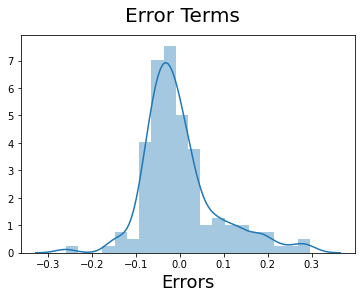

In [64]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

## Making Prediction

In [65]:



num_var = ['carlength','carwidth','carheight','wheelbase','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','price']

df_test[num_var] = scaler.transform(df_test[num_var])

df_test.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,MidTierCar,LuxuryCar,LowRisk,ModerateRisk
160,1,1,1,1,0.313793,0.409756,0.341667,0.460177,0.235066,0.139623,...,0,0,0,0,0,0,0,0,0,1
186,1,1,1,1,0.368966,0.497561,0.433333,0.699115,0.305275,0.181132,...,0,0,0,1,0,0,1,0,0,1
59,1,1,0,1,0.420690,0.596748,0.516667,0.522124,0.347944,0.230189,...,0,0,0,0,0,0,1,0,0,1
165,1,1,0,1,0.272414,0.448780,0.308333,0.424779,0.301396,0.139623,...,0,0,0,1,0,0,0,0,0,1
140,1,1,0,1,0.231034,0.263415,0.291667,0.699115,0.291699,0.177358,...,0,0,0,0,0,0,0,0,0,1


In [66]:
y_test = df_test.pop('price')
X_test = df_test

In [67]:

# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_1.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [68]:
# Making predictions
y_pred = linear_model.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

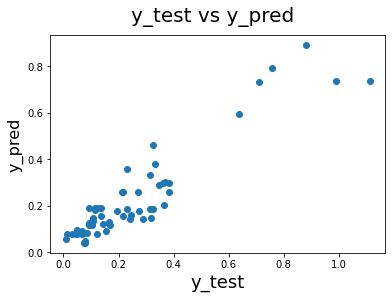

In [69]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [70]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8516642150638729

## Conclusion
Model built is fairly good model with r2 score of 0.85, error terms are normally distributed.
Deciding Factors are as following:

# horsepower, LuxuryCar, cylindernumber_four, carbody_convertible
